In [1]:
#Setting up any and all dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

#Reading CSV files 
payroll_df = pd.read_csv("Citywide_Payroll_Data__Fiscal_Year_.csv")
budget_df = pd.read_csv("Expense_Budget.csv")
budget_df.head()

#Code for setting up API as well
#url = "https://data.ny.gov/resource/k397-673e.json"
#payroll_df = requests.get(url).json()
#payroll_df =pd.DataFrame(payroll_df)
#payroll_df


,Publication Date,Fiscal Year,Agency Number,Agency Name,Unit Appropriation Number,Unit Appropriation Name,Budget Code Number,Budget Code Name,Object Class Number,Object Class Name,...,Financial Plan Savings Flag,Adopted Budget Amount,Current Modified Budget Amount,Financial Plan Amount,Adopted Budget Position,Current Modified Budget Position,Financial Plan Position,Adopted Budget - Number of Contracts,Current Modified Budget - Number of Contracts,Financial Plan - Number of Contracts
0,20160426,2017,2,MAYORALTY,21,OFFICE OF THE MAYOR-OTPS,0211,CHIEF OF STAFF,60,CONTRACTUAL SERVICES,...,N,0.0,320.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20160426,2017,2,MAYORALTY,21,OFFICE OF THE MAYOR-OTPS,0211,CHIEF OF STAFF,60,CONTRACTUAL SERVICES,...,N,9750.0,8950.0,9750.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20160426,2017,2,MAYORALTY,21,OFFICE OF THE MAYOR-OTPS,0211,CHIEF OF STAFF,60,CONTRACTUAL SERVICES,...,N,0.0,4500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,20160426,2017,2,MAYORALTY,21,OFFICE OF THE MAYOR-OTPS,0211,CHIEF OF STAFF,60,CONTRACTUAL SERVICES,...,N,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,20160426,2017,2,MAYORALTY,21,OFFICE OF THE MAYOR-OTPS,0211,CHIEF OF STAFF,60,CONTRACTUAL SERVICES,...,N,0.0,15390.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [2]:
#Check out how many agencies are in this file
num_of_agencies = budget_df["Agency Name"].nunique()
num_of_agencies = budget_df["Agency Name"].value_counts()
num_of_agencies

DEPARTMENT OF HEALTH AND MENTAL HYGIENE     36819
DEPARTMENT OF TRANSPORTATION                25936
DEPARTMENT OF PARKS AND RECREATION          20423
POLICE DEPARTMENT                           19380
DEPARTMENT OF EDUCATION                     17989
DEPARTMENT OF ENVIRONMENTAL PROTECT.        15864
HOUSING PRESERVATION AND DEVELOPMENT        13081
DEPARTMENT OF CITYWIDE ADMIN SERVICE        12411
FIRE DEPARTMENT                             12255
DEPARTMENT OF SANITATION                    11541
ADMIN FOR CHILDREN'S SERVICES                8821
DEPARTMENT OF HOMELESS SERVICES              8659
DEPARTMENT OF INFO TECH & TELECOMM           8650
DEPARTMENT OF SOCIAL SERVICES                8351
MAYORALTY                                    7532
CITY UNIVERSITY OF NEW YORK                  7234
DEPARTMENT OF FINANCE                        6901
DEPARTMENT OF SMALL BUSINESS SERVICES        6720
DEPARTMENT OF DESIGN & CONSTRUCTION          5407
DEPARTMENT OF YOUTH & COMMUNITY DEV          4234


In [9]:
#Agency budgets by year; Create a table that shows each agency's budget by year (2017, 2018, 2019)  

#Group agencies by year (2017, 2018, 2019)
agencies_2017 = budget_df.loc[budget_df["Fiscal Year"] == 2017].groupby("Agency Name")
agencies_2018 = budget_df.loc[budget_df["Fiscal Year"] == 2018].groupby("Agency Name")
agencies_2019 = budget_df.loc[budget_df["Fiscal Year"] == 2019].groupby("Agency Name")

#Sum up budgets by those groups
budget_2017 = pd.DataFrame(agencies_2017["Current Modified Budget Amount"].sum())
budget_2018 = pd.DataFrame(agencies_2018["Current Modified Budget Amount"].sum())
budget_2019 = pd.DataFrame(agencies_2019["Current Modified Budget Amount"].sum())

budget_by_year = pd.merge(budget_2017, budget_2018, on="Agency Name")
budget_by_year = pd.merge(budget_by_year, budget_2019, on="Agency Name")

budget_by_year.columns = ["2017", "2018", "2019"]

budget_by_year = budget_by_year.sort_values(by=["2019"], ascending=False)
budget_by_year.head(20)

,2017,2018,2019
Agency Name,,,
DEPARTMENT OF EDUCATION,4.421820e+10,7.001744e+10,7.379264e+10
MISCELLANEOUS,1.893024e+10,2.912227e+10,2.980799e+10
DEPARTMENT OF SOCIAL SERVICES,1.906238e+10,2.910364e+10,2.975823e+10
PENSION CONTRIBUTIONS,1.862823e+10,2.823016e+10,2.879398e+10
POLICE DEPARTMENT,1.103449e+10,1.658441e+10,1.743227e+10
DEBT SERVICE,1.065830e+10,1.497086e+10,1.527530e+10
ADMIN FOR CHILDREN'S SERVICES,5.956946e+09,9.078936e+09,9.459833e+09
FIRE DEPARTMENT,4.086956e+09,6.169099e+09,6.338845e+09
DEPARTMENT OF HOMELESS SERVICES,2.639363e+09,4.960906e+09,5.779434e+09


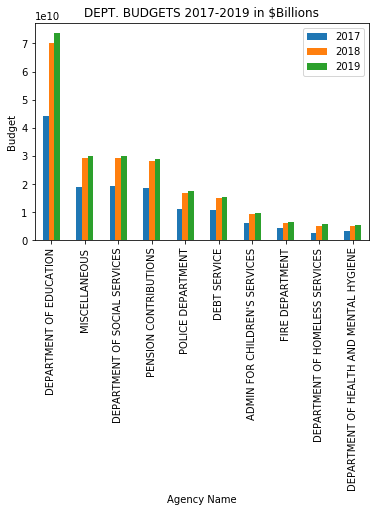

In [4]:
# Generate the Plot
row = budget_by_year.iloc[0:10]
row.plot(kind='bar')
plt.title("DEPT. BUDGETS 2017-2019 in $Billions")
plt.ylabel("Budget")
plt.show()

# Make it pretty

#plt.xlabel("Time (Days)")

#plt.legend()
#plt.grid()

# Save the Figure
# plt.savefig("Agency Budget by Year.png")

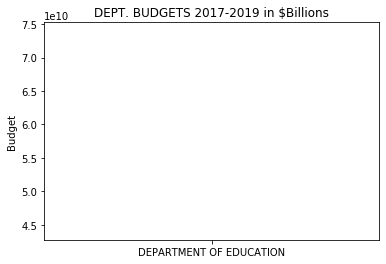

In [5]:
# Generate the Plot
row = budget_by_year.iloc[0:1]
plt.plot(row)
plt.title("DEPT. BUDGETS 2017-2019 in $Billions")
plt.ylabel("Budget")
plt.show()


In [6]:
#Group data by agency
groupedby_agency = budget_df.groupby(["Agency Name"])

#Agency name is just type in the original data
agency_name = groupedby_agency["Agency Name"].first()

#Agency name is just type in the original data
#fiscalyear = groupedby_agency["Fiscal Year"].first()

#Total agency budget (sum of all "Current Midfiied Budget Amount" per agency)
total_budget_per_agency = groupedby_agency["Current Modified Budget Amount"].sum()

#Agency budget summary
agency_budget_summary = pd.DataFrame({
            "Total Budget By Agency": total_budget_per_agency,
            })

agency_budget_summary.head()

top_budget_sort = agency_budget_summary.sort_values(by=["Total Budget By Agency"], ascending=False)
top_budget_sort.head(20)

#Why does Department of education come up twice??

,Total Budget By Agency
Agency Name,
DEPARTMENT OF EDUCATION,2.415795e+11
MISCELLANEOUS,9.863739e+10
DEPARTMENT OF SOCIAL SERVICES,9.829561e+10
PENSION CONTRIBUTIONS,9.544792e+10
POLICE DEPARTMENT,5.692670e+10
DEBT SERVICE,5.311481e+10
ADMIN FOR CHILDREN'S SERVICES,3.106049e+10
DEPARTMENT OF EDUCATION,2.575294e+10
FIRE DEPARTMENT,2.085300e+10


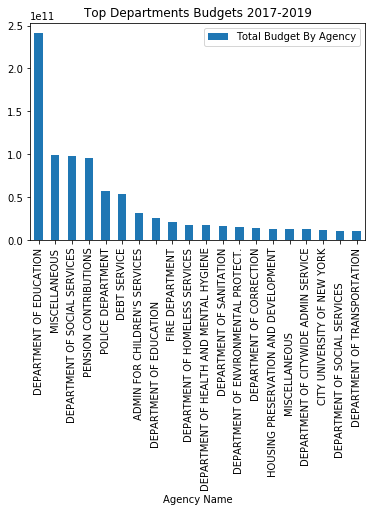

In [7]:
# Generate the Plot
row = top_budget_sort.iloc[0:20]
row.plot(kind='bar')
plt.title("Top Departments Budgets 2017-2019")
plt.show()